In [1]:
#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from tqdm import tqdm, notebook
notebook.tqdm().pandas()

0it [00:00, ?it/s]

In [3]:
# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(25,7)})

Get the path to retrieve data from local folder

#### Using the provided csv file to link qids with meaningful names for speakers metadata

In [4]:
df_lookup = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2',compression = 'bz2',index_col='QID')

## Speakers Aggregation

### Import quotes data

In [7]:
#Retrieve the dataset containing all speakers with the fraction of the colloquial language 
#Import the speakers metadata
#path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/BIG_SAMPLE/'
#file_path = path+'Sample_2020_classified.json.bz2'

path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/BIG_SAMPLE/Results_LR/'
file_path = path+'df_LR_2020.json.bz2'

df_quotes =  pd.read_json(file_path,compression = 'bz2',lines = True)

In [11]:
df_quotes.columns

Index(['quoteID', 'quotation', 'speaker', 'qid_unique', 'date', 'urls', 'p1',
       'p2', 'delta_p', 'year', 'colloquial', 'label', 'aliases',
       'date_of_birth', 'nationality', 'gender', 'lastrevid', 'ethnic_group',
       'US_congress_bio_ID', 'occupation', 'party', 'academic_degree', 'id',
       'candidacy', 'type', 'religion', 'age', 'bi_party'],
      dtype='object')

### Import american politic speakers metadata

In [17]:
file_path = path+'df_speakers_pol.json.bz2'
df_speakers_meta =  pd.read_json(file_path,compression = 'bz2',lines = True)

### Group the qi by speaker

In [13]:
#Define the interesting columns 
columns_use = ['quoteID', 'quotation', 'speaker', 'qid_unique', 'date', 'urls', 'p1',
       'p2', 'delta_p', 'year', 'colloquial', 'label', 'aliases',
       'date_of_birth', 'nationality', 'gender', 'lastrevid', 'ethnic_group',
       'US_congress_bio_ID', 'occupation', 'party', 'academic_degree', 'id',
       'candidacy', 'type', 'religion', 'age', 'bi_party']

In [18]:
df_grouped = df_quotes.groupby(['qid_unique', 'colloquial']).size().unstack(fill_value=0).reset_index()
df_grouped['quotes_number'] = df_grouped[1]+df_grouped[0]
df_grouped.sort_values(['quotes_number'], ascending=False) 

# Create also a column (called "fraction") that computes the fraction of colloquial quotes over total quotations. (by speaker)
df_grouped['fraction']=df_grouped[1]/(df_grouped['quotes_number'])
df_grouped.reset_index().sort_values(['fraction'], ascending=False)

#Merge with speakers metadata
df_aggreg = df_grouped.merge(df_speakers_meta,how='inner',left_on='qid_unique', right_on='id')

In [20]:
df_aggreg.reset_index().sort_values(['quotes_number'], ascending=False)

,index,qid_unique,0,1,quotes_number,fraction,label,aliases,date_of_birth,nationality,...,US_congress_bio_ID,occupation,party,academic_degree,id,candidacy,type,religion,age,bi_party
1760,1760,Q359442,4709,630,5339,0.118000,Bernie Sanders,[Bernard Sanders],-8.935488e+11,[Q30],...,S000033,"[Q82955, Q1930187, Q154549, Q1622272, Q36180, ...","[Q6542163, Q29552, Q327591, Q327591, Q29552]",[Q1765120],Q359442,None,item,[Q9268],80.0,Democrat
28,28,Q11673,4354,768,5122,0.149941,Andrew Cuomo,[Andrew Mark Cuomo],-3.809376e+11,[Q30],...,None,"[Q40348, Q82955]",[Q29552],[Q1540185],Q11673,"[Q22023432, Q65047185]",item,[Q1841],64.0,Democrat
1848,1848,Q434706,2654,583,3237,0.180105,Elizabeth Warren,"[Elizabeth Ann Warren, Senator Warren, Elisabe...",-6.478272e+11,[Q30],...,W000817,"[Q185351, Q82955, Q37226, Q1622272, Q40348, Q1...",[Q29552],"[Q163727, Q1540185]",Q434706,[Q28220813],item,[Q33203],72.0,Democrat
1070,1070,Q180589,2788,224,3012,0.074369,Boris Johnson,"[Boris, Alexander Boris de Pfeffel Johnson, Bo...",-1.747008e+11,"[Q30, Q145]",...,None,"[Q1930187, Q82955, Q1607826, Q36180, Q11774202...",[Q9626],None,Q180589,"[Q30173038, Q30325756, Q428598, Q590740, Q3586...",item,[Q6423963],57.0,None
1959,1959,Q473239,2456,350,2806,0.124733,Mike Pompeo,"[Michael Richard ""Mike"" Pompeo, Michael Richar...",-1.895616e+11,[Q30],...,P000602,"[Q40348, Q43845, Q2961975, Q189290, Q82955]",[Q29468],None,Q473239,None,item,[Q178169],57.0,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,367,Q16185293,1,0,1,0.000000,Frank Chopp,None,-5.250528e+11,[Q30],...,None,[Q82955],[Q29552],None,Q16185293,None,item,None,68.0,Democrat
368,368,Q16185327,1,0,1,0.000000,John Ellison,None,-5.364576e+11,[Q30],...,None,[Q82955],[Q29468],None,Q16185327,None,item,None,68.0,Republican
2915,2915,Q6369678,1,0,1,0.000000,Karen Handel,None,-2.432160e+11,[Q30],...,H001078,"[Q82955, Q2961975, Q703534, Q36180]",[Q29468],None,Q6369678,None,item,None,59.0,Republican
2919,2919,Q6369797,1,0,1,0.000000,Karen Kwiatkowski,None,-2.925504e+11,[Q30],...,None,"[Q189290, Q36180, Q82955, Q1930187]",[Q29468],None,Q6369797,None,item,None,61.0,Republican


## Statistics

### Plot distribution for number of quotations

Text(0.5, 0, 'Number of quotes')

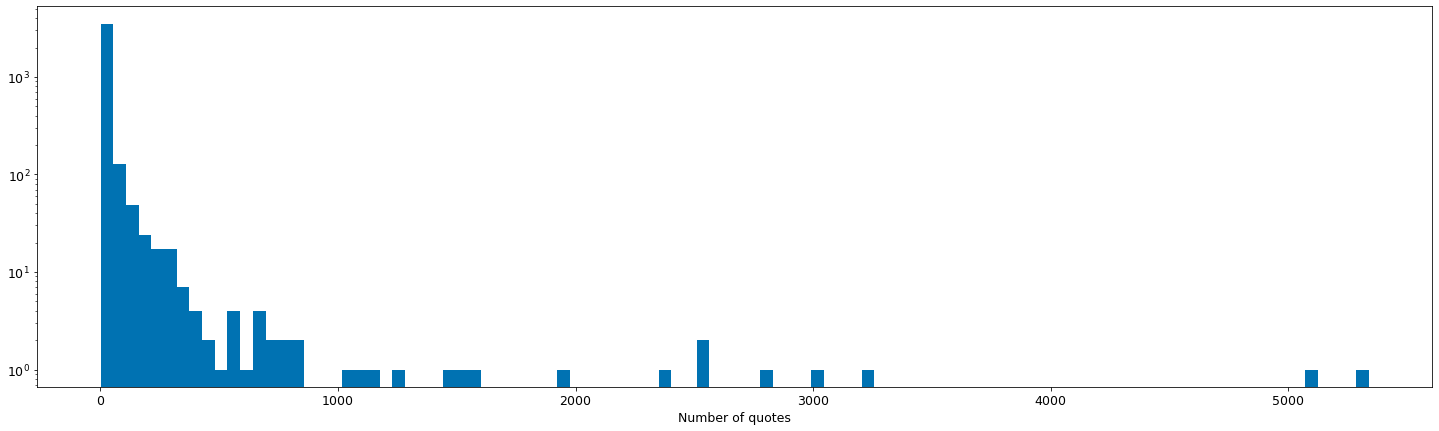

In [41]:
plt.hist(df_aggreg['quotes_number'],bins=100,log=True);
plt.xlabel('Number of quotes')

Text(0.5, 0, 'Colloquial fraction')

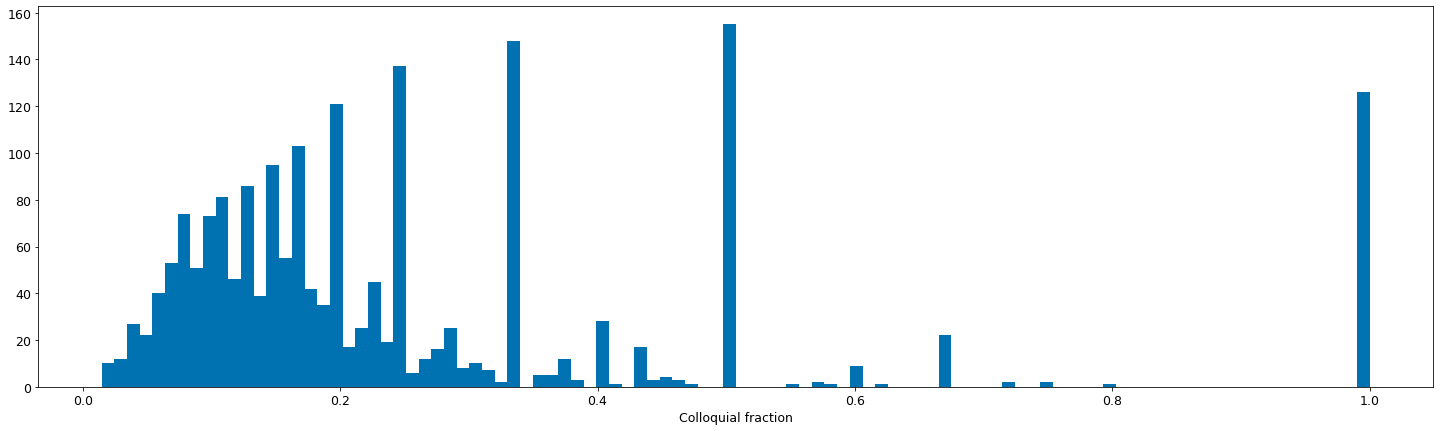

In [40]:
plt.hist(df_plot['fraction'],bins=100,log=False);
plt.xlabel('Colloquial fraction')


### Plot the repartition in ages

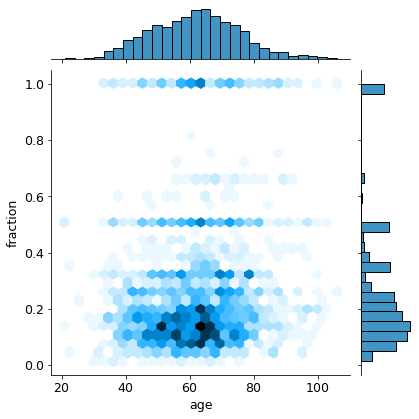

In [26]:
#Remove all politics with fraction equal to 0
df_plot = df_aggreg[df_aggreg['fraction']!=0]
sns.jointplot(x=df_plot['age'], y=df_plot['fraction'], kind="hex")

### Plot the repartition of colloquial between Democrat and Republican 

Text(0, 0.5, 'Average fraction of colloquial')

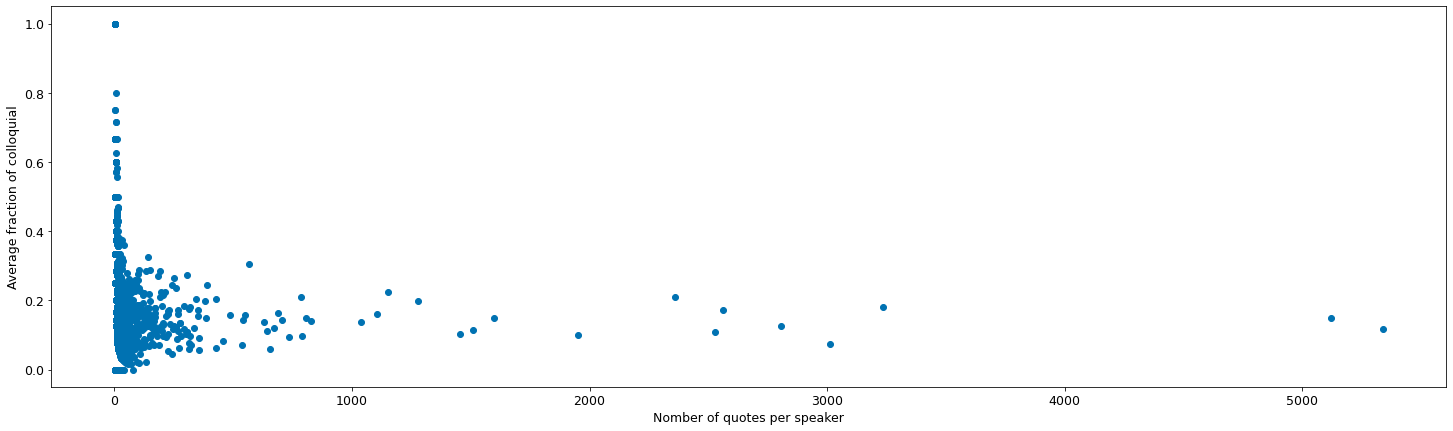

In [42]:
plt.scatter(df_aggreg['quotes_number'], df_aggreg['fraction'])
plt.xlabel('Nomber of quotes per speaker')
plt.ylabel('Average fraction of colloquial')

### Plot the distribution of colloquial language speaker in political party

[Text(0, 0.5, 'Average fraction of colloquial quotations')]

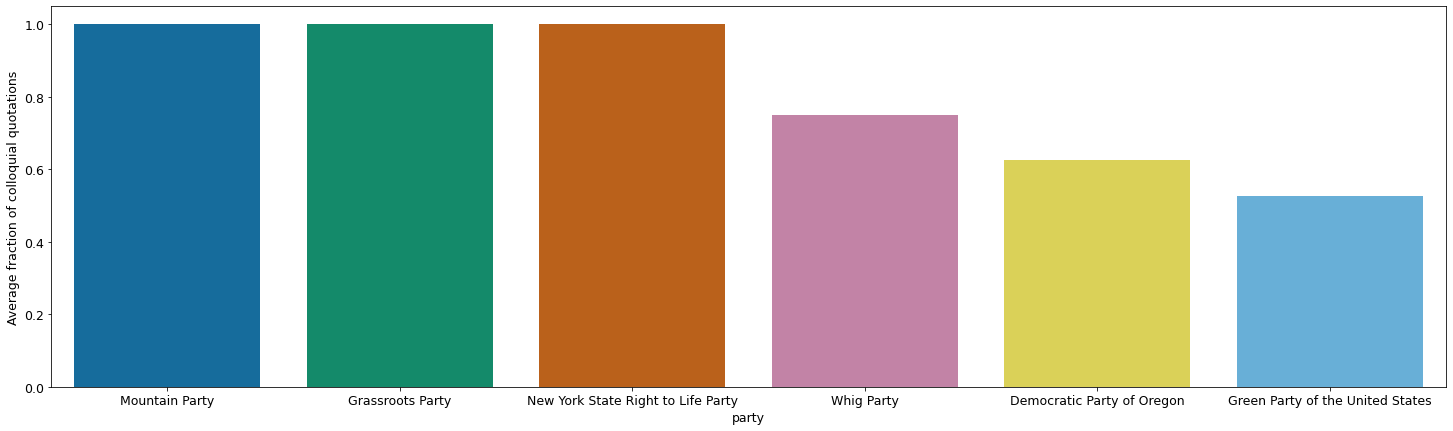

In [18]:

df_party=df_polUS_2.copy()
#Replace label column at the first place to see speakers names
df_party.dropna(axis = 0, subset=['party'], inplace=True)

#Drop all speakers that several parties
oneparty_cond = df_party['party'].apply(lambda x: len(x)==1)

#Transforma a list into one element
df_party['party'] = df_party['party'].apply(lambda x: x[0]) 

df_party = df_party[oneparty_cond]

#Not taking in account the occupation with fraction equals to 1 (correspond to speakers with not sufficient amount of quotations)
df_plot = df_party.groupby('party')['fraction'].mean() \
           .reset_index(name='mean_fraction')\
            .sort_values(['mean_fraction'], ascending=False)
#Not taking in account the occupation with fraction equals to 1 (correspond to speakers with not sufficient amount of quotations)

#df_plot = df_plot[df_plot['mean_fraction']!=1]
df_plot['party'] = df_plot['party'].apply(lambda x: df_lookup.loc[x]['Label'])

ax = sns.barplot(x='party', y="mean_fraction", data=df_plot[:6])
ax.set(ylabel='Average fraction of colloquial quotations')

In [19]:
print("There are {} parties in our dataset".format(len(df_plot)))

There are 62 parties in our dataset
